### Author: Laxman Krishna Bist

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading the data from a csv file
df = pd.read_csv("spark_data.csv")
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Checking descriptive summary statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
#Checking data types, overall dimensions and checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


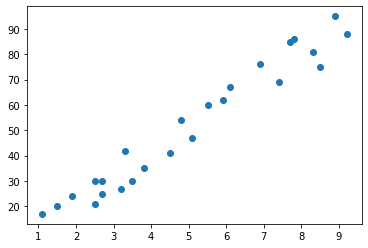

In [5]:
#Scatter plot to check for relationship between number of hours studied and scores
plt.scatter(x=df["Hours"], y=df["Scores"])

#### We can clearly see a positive correlation between the number of hours studied and scores from the above scatter plot

In [6]:
#separating the dependent and the independent variable
X=df[["Hours"]]
y=df["Scores"]

In [7]:
#Splitting the training and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=48) 

#### Instantiating and training the model on the train set

In [8]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression()

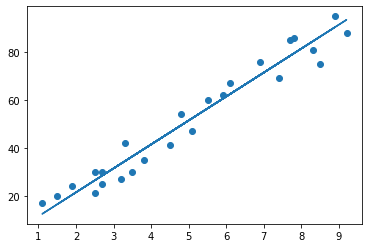

In [9]:
# Plotting the regression line
line = model.coef_*X+model.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Predicting on the test set

In [10]:
print(X_test) #Number of hours as imput
y_pred = model.predict(X_test) # Predicting the scores

    Hours
3     8.5
10    7.7
21    4.8
1     5.1
5     1.5


In [12]:
# Comparing Actual score vs Predicted score
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
3,75,86.507846
10,85,78.495044
21,54,49.448640
1,47,52.453440
5,20,16.395835


In [15]:
# Predicting the score for 
hours = [[9.25]]
pred = model.predict(hours)
print("Predicted Score for studying 9.25 hrs/day is = {}".format(pred[0]))

Predicted Score for studying 9.25 hrs/day is = 94.01984693054814


### Evaluating the model performance

In [18]:
#R score
model.score(X_test, y_test)*100

90.77784347588175

### We get a model R score of 90.78%, which means 90.78% of the variation in the Score can be explained by our model

In [21]:
#MAPE score
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

np.round(mape(y_test,y_pred),2)


12.21

### The mape score for the model is 12.21, which means that at an average the percentage difference between the actual and the predicted score is 12.21%